# LYCET PROJECT -- Milestone 1 -- AC 207

### Date of final version: 10/20/2022<br>
### Group members:
$\color{red}{\text{(L)oralee Ryan}}$<br>
$\color{red}{\text{(Y)anis Vandecasteele}}$<br>
$\color{red}{\text{(C)helsey Campillo}}$<br>
$\color{red}{\text{(E)laine Swanson}}$<br>
$\color{red}{\text{(T)adhg Looram}}$

## Introduction

   Our software, LYCET, represents compositional learning. LYCET is a laboratory where we formalize and optimize complicated computational structures with a well-established tool called automatic differentiation (AD). This tool uses simple arithmetic expressions (functions of one distinguished variable) in an algorithm. It does so to mechanically transform a numeric function and calculate the derivatives of that function efficiently. This is important because a LYCET user wants to know information about that function’s derivative for a variety of available implementations in science, economics, and engineering (e.g. microfluidics, finance, agriculture). Numerical analysis of ODEs/PDEs, optimization, and linearization are a few of these implementations that rely on the fundamental mathematical process of differentiation.
    
   However, the method used to gain information on the function’s derivative might not be stable or computationally realistic. Finite differentiation (FD) is one method alternative to AD. FD is a common tool used in numerical analysis where an exact formula for $f(x)$ is not known. In this tool, there is only a set of data points to approximate the functional relationship by estimating the rate of change of the output with respect to the input. The finite difference formulas to compute these approximations occurs with the cost of introducing error and possible stability issues.
    
   There is also the method of symbolic differentiation (SD). Similar to AD, SD uses the chain rule to calculate the resulting derivative. Where it differs from AD is its focus on manipulating the mathematical expressions rather than manipulating the numerical values. Depending on the complexity of $f(x)$, this may be too computationally expensive or not even applicable. 
    
   Our LYCET software overcomes the downsides of AD alternatives, and computes a gradient of functions both inexpensively and accurately via AD.

## Background

The foundation of LYCET’s AD algorithm is differential calculus, the study of rates at which quantities change. When the derivative of a function exists at a chosen input value, it can be graphed as the slope of the tangent line of the function at that point. The tangent line is the best linear approximation of the function near that input value. Thus, the derivative, $f^{\prime}(a)$, is the instantaneous rate of change of $y = f(x)$ with respect to $x$ when $x = a$.<br>
LYCET’s ability to perform automatic differentiation relies on applying the chain rule repeatedly to elementary arithmetic operations and expressions. By doing so, derivatives of arbitrary order can be computed automatically and accurately to working precision. The chain rule is a formula to compute the derivative of a composite function. It can be expressed as:
$f(g(x))^{\prime}=f^{\prime}(g(x)) \, \cdot \, g^{\prime}(x)$ for $f$ and $g$ sufficiently differentiable.<br>
To mechanically transform a numerical function and calculate the derivatives of such, the set of elementary functions must be identified. This set contains functions of a single variable (typically real or complex), that are continuous on their domains, and must be sufficiently differentiable. AD will not output the correct result if it is evaluating the derivative of a function where it is not differentiable. In LYCET, elementary functions will be implemented in the system together with their gradients.<br>
Examples of such expressions:<br>
* Constant functions<br>
* Rational powers of x<br>
* Exponential functions and their inverses<br> 
* Trigonometric functions and their inverses<br>
* Composite functions:<br>
    * Addition and subtraction<br>
    * Multiplication and division<br>
    * Polynomial functions<br>

These mechanical transformations are visually represented in computational graphs. These graphs act as functional descriptions of the required computation AD must perform. For a single function, there may be many possible computational graphs, but all final outputs must be equal. A computational graph takes in $m$ inputs, and can be described as $m$-ary (e.g. nullary, unary, binary, …). The final output can be single-valued or multiple-valued depending on the nature of the function (scalar or a vector). These graphs make use of intermediate results represented in the nodes of the graph. The arrows are the elementary operations performed on the intermediate results. The nodes represent the input values ($v_{i≤0}$ for $\lvert \{i\} \rvert=\lvert \{m\} \rvert)$ and the intermediate results ($v_{i>0}$). <br>
<br>
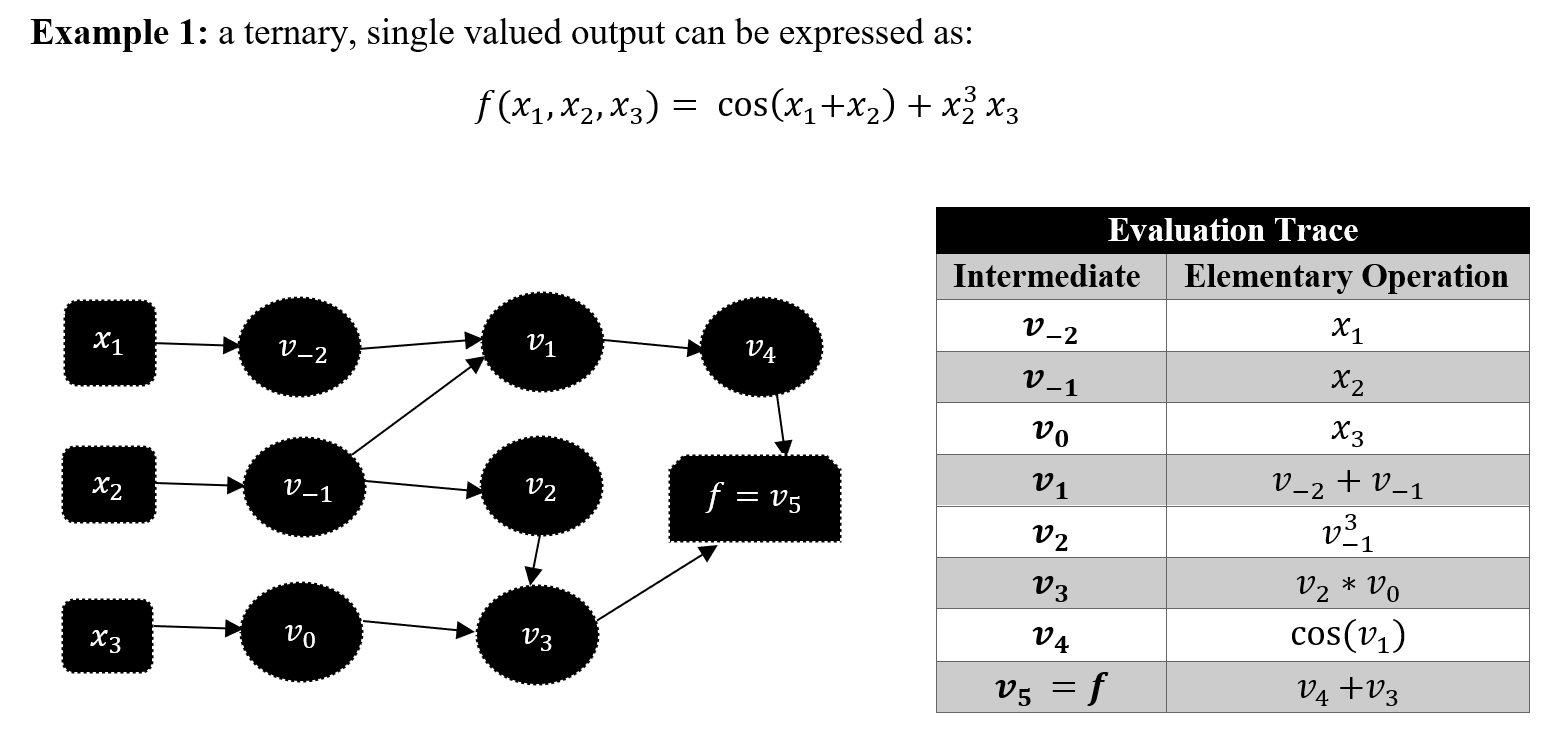<br><br>

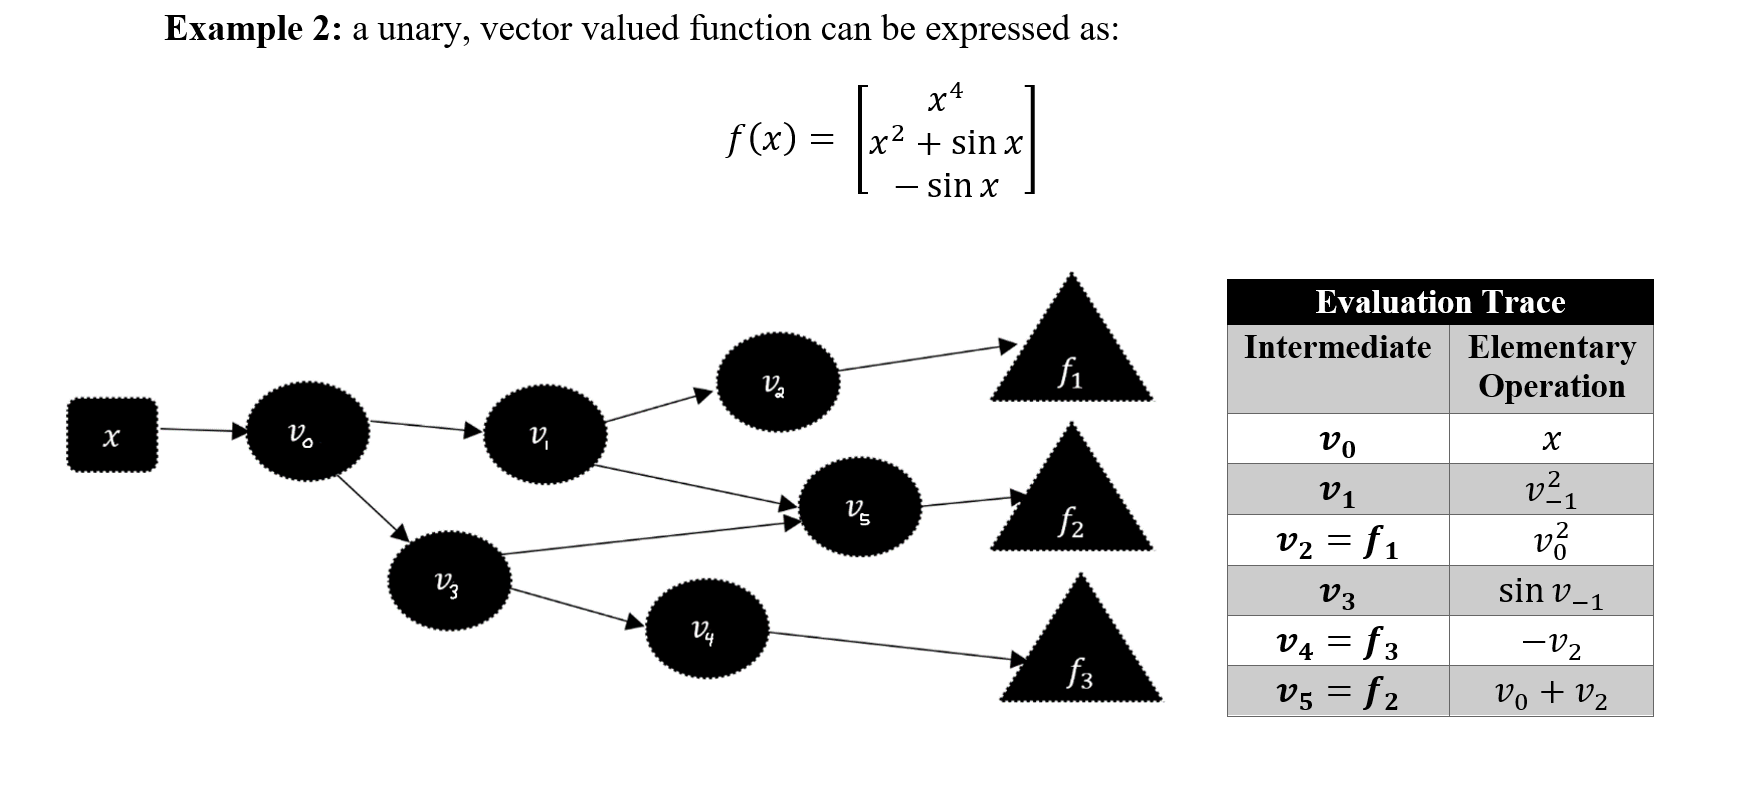

The evaluation trace of a function is required to keep track of the partial ordering and intermediate results after elementary operations are performed. In EXAMPLE 1 and 2 above, the tables provided are examples of the primal trace, the mechanical breakdown into elementary functions. When numeric(s) are fed into the function, the answer is computed step by step. The values of every step’s computation are stored, and a third column “Numerical Value”, is created.  
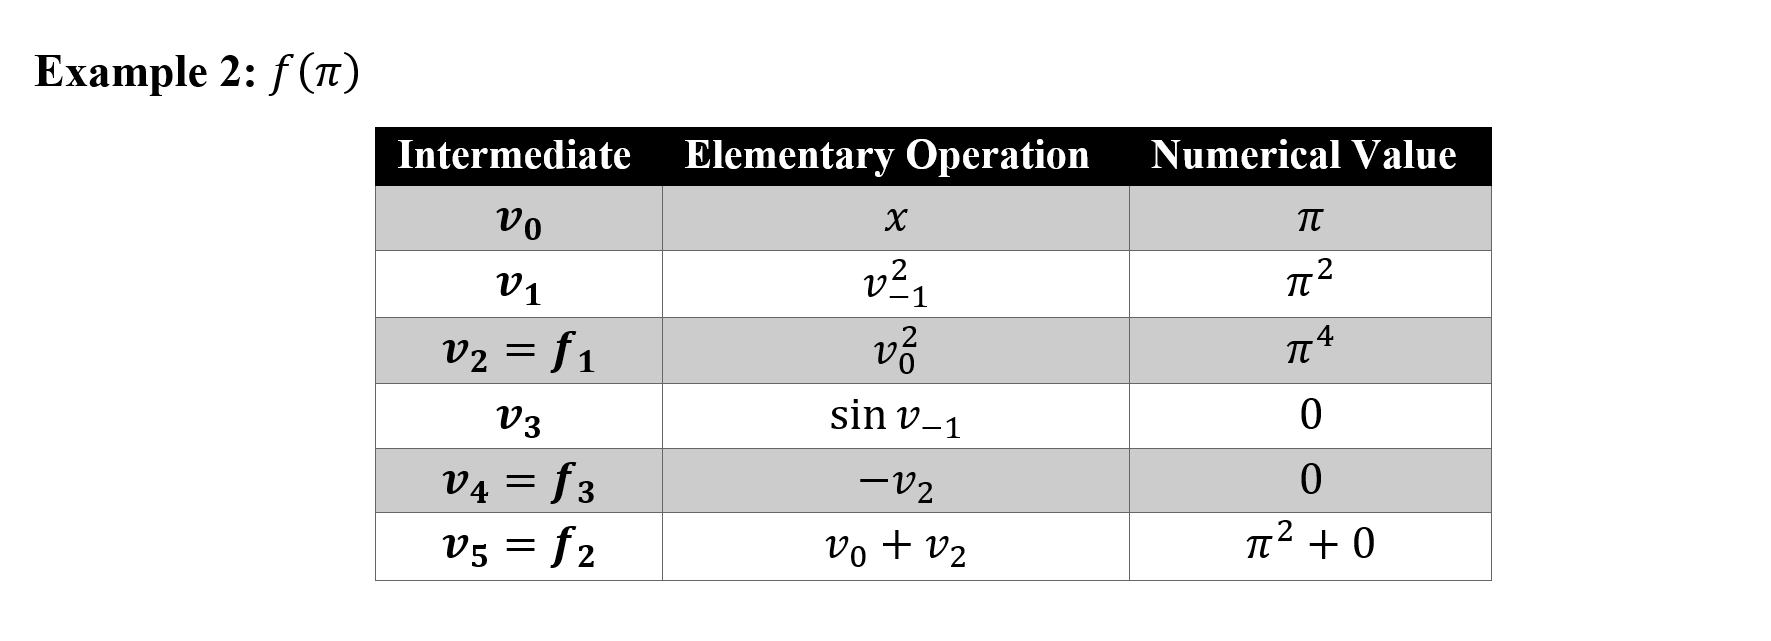

#### Modes
If there are many more outputs than there are number of inputs, then forward mode AD is more efficient. However, if there are many more inputs than outputs, reverse mode AD is more efficient.  

#### Forward Mode and Dual Numbers
Our LYCET software initializes forward mode AD and breaks down the function given by the user into a sequence of differentiable elementary operations. It tracks the result in the primal evaluation trace. The chain rule and well-known differentiation rules are then applied to each elementary operation, and a directional derivative is produced as the tangent evaluation trace. A simple implementation of the AD technique is via dual numbers, of the form $a +be$. The dual number is composed of part $a$, the intermediate result (say, function $f$) and part $b$ as $f^{\prime}$. With these dual numbers, AD can evaluate both the primal trace and the tangent trace with a single computation. Every dual number represents a row of the evaluation trace. AD then carries the primal and tangent trace forward as a pair but does not store previous dual numbers.<br> 
In LYCET, the simplicity of the chain rule above is engrained in the definition of the gradient for $f$. Forward mode is computing the gradient vector in the direction of a seed vector $p$. It is called the directional derivative. The most generalized form of what forward mode AD computes is a vector function $f(x): \mathbb{R}^m \mapsto \mathbb{R}^n$. The Jacobian is utilized when the function to be evaluated is vector valued, and it is represented as:
$J \cdot p$ where $J$ is an element of $ \mathbb{R}^{nxm}$ and $p$ is an element of $ \mathbb{R}^m$, the same size as our input values. We are projecting the Jacobian in the direction given by $p$.
<center>$J_{f(x)}= \left(\frac{\delta f_i (x)}{\delta x_j }\right)_{ij}$</center>
With every pass of forward mode, the user feeds in a numerical direction vector that they are interested in, and the evaluation trace produces the accurate partial derivatives of their function at certain point. The following table shows an example of the complete forward mode evaluation trace for the EXAMPLE 2 above.

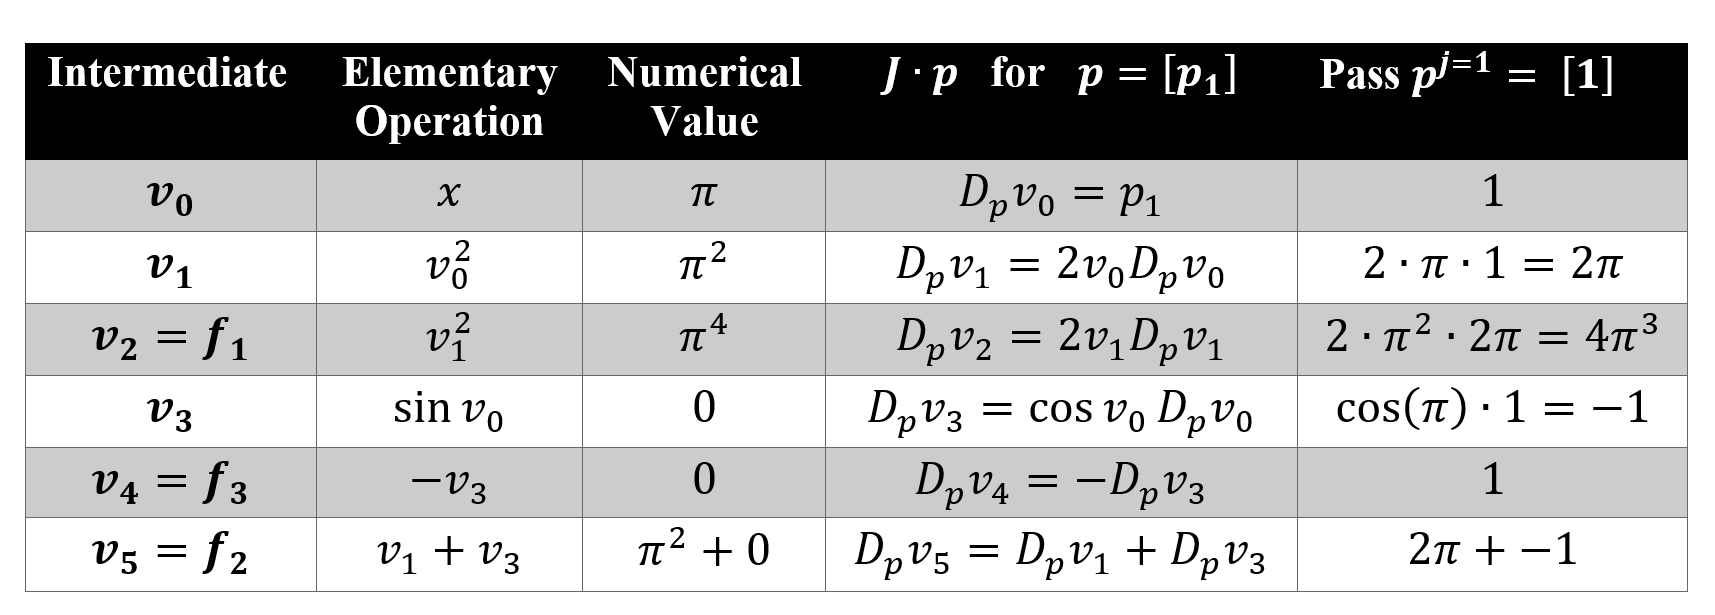<br>
### Reverse Mode
LYCET will possibly implement the reverse mode method as a project extension. In reverse mode AD, the dependent variable to be differentiated is fixed and the derivative is computed with respect to each sub-expression recursively. The reverse mode only contains one pass (forward pass and reverse pass are considered one pass).
The following graph shows an example of reverse accumulation with computational graph.

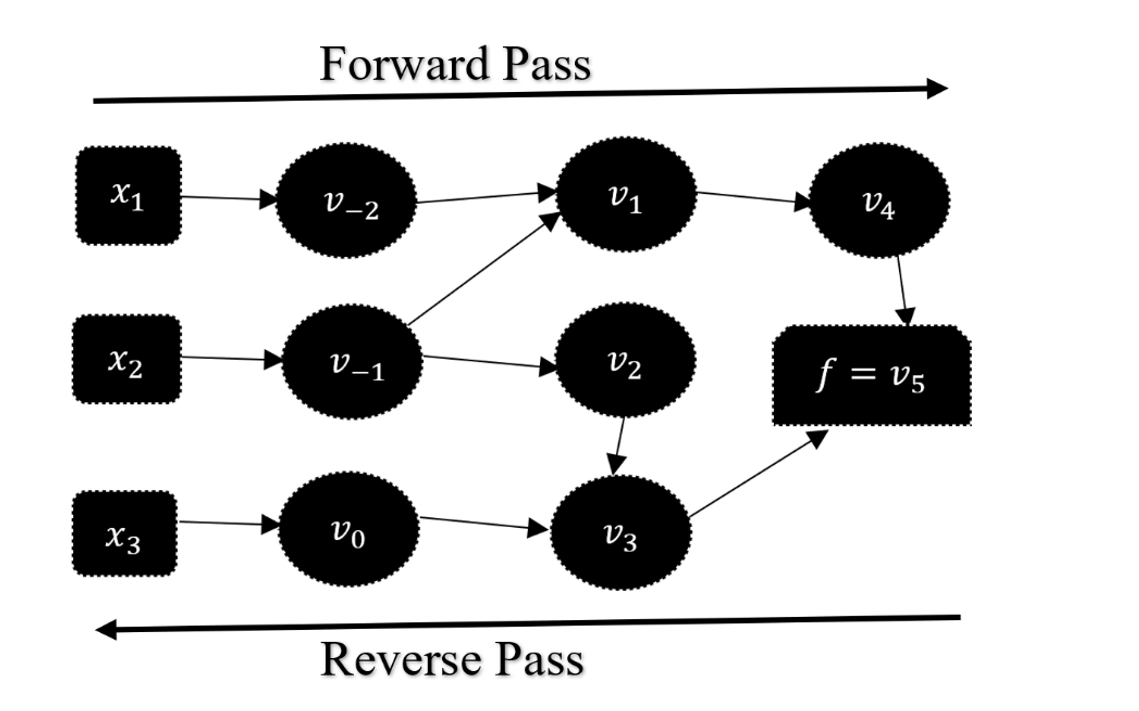<br><br>
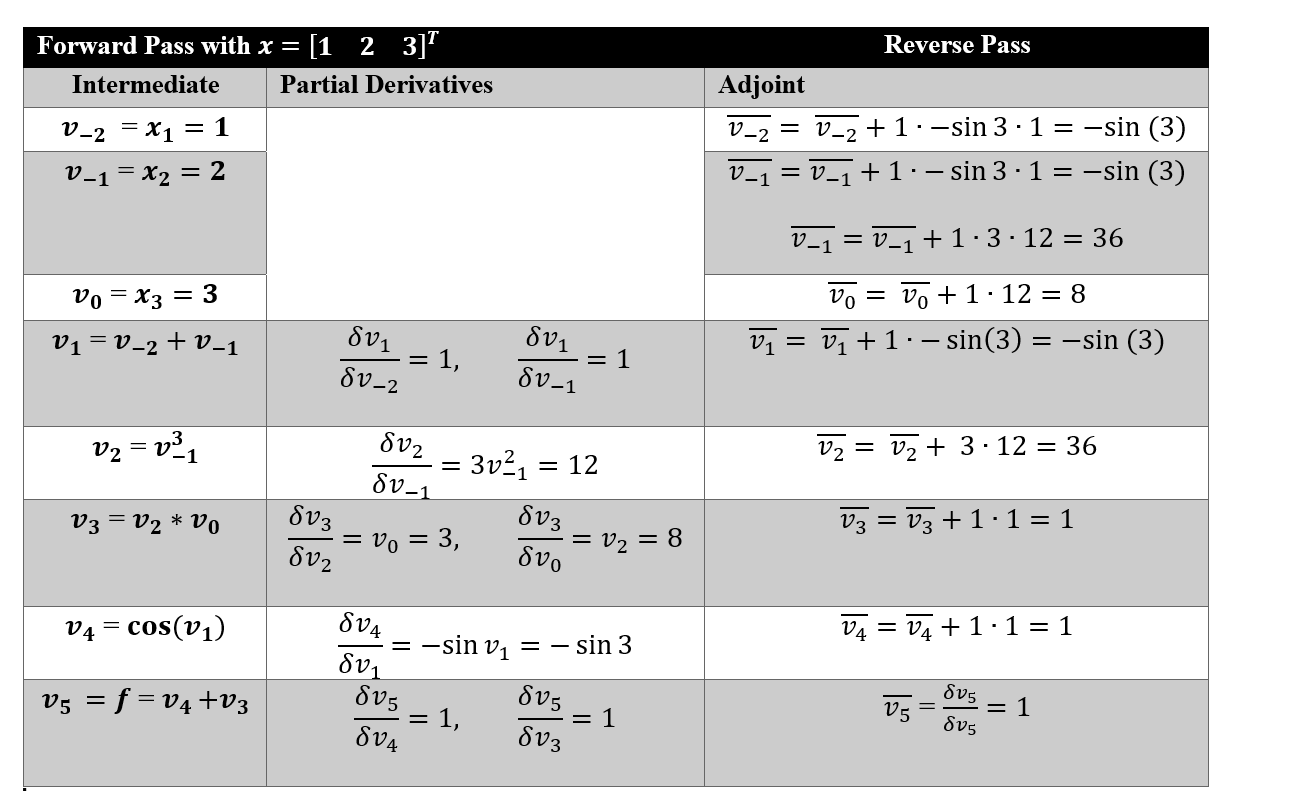


## How to use LYCET

In order to work with LYCET, the user would follow the steps outlined below:

**1. Install the package:**

```pip install LYCET```

**2. Import the following classes:**

```
from LYCET import math as lm
from LYCET import Dual 
from LYCET import ForwardModeEvaluation as fme
import numpy as np
``` 

**3. Define $f(x)$, x, and p:**
```
f = lambda x: lm.exp(x) + lm.exp(x)
x = [2, 0.5]

# evaluate df in the direction of $x_2$
p = [0, 1]
```

**4. Define dual number(s):**
```
z1 = Dual(1, 4)
```

**5. Evaluate $f(x)$:**
```
df = fme(f, x, p, z1)
```

_If the user would like to check the values of the primal and tangent traces, they can simply call getitem:_

```
curr_primal = z1.getitem('primal')
curr_tangent= z1.getitem('tangent')
```

## Software Organization

The structure of our project would be the following:

Python project:

    - LICENSE full license text and copyright claims: MIT License
    - .gitignore
    - Requirements.txt development dependencies, list of items to be installed to use the package: NumPy
    - Pyproject.toml :  tells “frontend” build tools like pip and build what “backend” tool to use to create distribution packages and configure metadata
    - README.md
    - Setup.py package and distribution management
    - Src : The code of interest, module package AD package
        - Auto diff package:
            - __init__.py
            - __main__.py
            - function:
                - __init_.py
                - func.py
            - Dual: dual number class
                - __init__.py
                - Differentiation.py (can do gradient, jacobian)
            - ForwardModeEvaluation: forward mode evaluation class
                - __init__.py
                - Evaluation.py (evaluate a dual number given a seed vector and input variables)
            - TBD (Reverse?)
                - __init__.py
                - TBD.py
    - Tests: test suite, package integration and unit tests
        - Test_basic.py
        - Test_advanced.py



 We will distribute our package using PyPI with PEP517/518.


## Implementation

#### What classes do you need and what will you implement first?

* We will need 3 classes:
    * The first will be a class named Dual, which simultaneously compute and store the primal and tangent traces, it will implement the differentiation and calculate the generalized gradient.
    * The second will be a Forward Mode Evaluation class, which will take a seed vector and input values and evaluate the dual number. 
        * Per our understanding, the dual class should be implemented first to create the primal and tangent traces that will be an input of the Forward Mode Evaluation class. 
    * The third class is yet to be determined and will be decided in milestone II. 

#### What are the core data structures? How will you incorporate dual numbers?

* Our Core data Structure will consist of linear and nonlinear data structures.
* Python dictionaries, NumPy arrays and our dual number type will make up our linear data structures. 
* Computational graphs is an example of a none linear data structure that will be utilized. 
* Dual numbers will be incorporated through a dynamic data structure class we implement.

#### What method and name attributes will your classes have?

* The Dual class will have the following methods and attributes
    * Attributes:
        * Primal trace
        * Tangent trace
    * Methods:
        * The init method will take as input the primal and the tangent traces and will create a tuple attribute to represent the dual number.  We will overload the arithmetic operations for dual numbers. For example making the operators commutative  and associative where appropriate. E.g: let $z_1$ and $z_2$ be two dual numbers where $z_1 = a_1 + b_1\epsilon$ and $z_2 = a_2 + b_2\epsilon$ then $z_1*z_2 = a_1*a_2 + (a_1*b_2 + a_2*b_1)\epsilon$.
        * We will also implement the __getitem__ and __setitem__ to access and modify either the primal or tangent trace elements.
        * Derivative will differentiate along a general vector p and return the function and general gradient function as a dual number type.
* The Forward Mode Evaluation class will have the following methods and attributes
    * Attributes: Jacobian matrix, dual number
    * Methods: evaluate will take in the dual number, the seed vector and input values and evaluate the user defined function and the derivative.
    
#### Will you need some graph class to resemble the computational graph in forward mode or maybe later for reverse mode? Note that in milestone 2 you propose an extension for your project, an example could be reverse mode.

For the forward mode of autodiff, We will store the evaluation trace and the computational graph information in a dictionary data structure.

First, the Intermediate dependent variables $v_j$ will be stored as keys and their underlying operations as values, for example in the function $f(x_1,x_2,x_3) = cos(x_1,x_2) + x_2^3*x_3$ the evaluation trace will look like:,

graph = { $V_{-2} : x_1$,<br>
          $V_{-1} : x_2$,<br>
          $V_0  :  x_3$,<br>
          $V_1  :  V_{-2}+V_{-1}$,<br>
          $V_2  :  V_{-1}^3$,<br>
          $V_3  :  V_2*V_0$,<br>
          $V_4  :  cos(V_1)$,<br>
          $V_5  :  V_4+V_3$,<br>
        } 

As a bonus we may want to visualize the computational graph, which will required an additional dictionary where the keys of the dictionary will correspond to the nodes of our graph (Each node is an operator) and the corresponding values are lists of each related nodes, connected by an edge.

For the same example $f(x_1,x_2,x_3) = cos(x_1,x_2) + x_2^3*x_3$

the computational graph would be stored in the follow dictionary :

graph = { $x1      : V_{-2},$ <br>
          $x2      : V_{-1},$ <br>
          $x3      : V_0,$<br>
          $V_{-2}  : x1,V_1,$<br>
          $V_{-1}  : x2,V_1, V_2,$ <br>
          $V_0     : X3,V_3,$<br>
          $V_1     : V_{-2},V_{-1},V_4,$<br>
          $V_2     : V_{-1},V_3,$<br>
          $V_3     : V_0,V_2,V5,$<br>
          $V_4     : V_1,V_5,$<br>
          $V_5     : V_3,V_4,$<br>
        } 


#### Think about how your basic operator overloading template should look like. 

* Our basic operator template will be design such that elementary operations and derivates can be evaluated on dual numbers.
* Our Basic operator overloading template will perform the derivatives following the sum, product and chain rule. The idea behind the operator is to define the rules of derivation via elementary functions. 
* For elementary functions like sin, sqrt, log and exp, on a dual number the function should be applied to the prime trace and the function derivative should be applied to the tangent trace. 
* For example to deal with sin() on an input dual number, it should return another dual number such that the output is sin() on the primal trace part and cos() on the tangent trace part.

#### How will you deal with elementary functions like sin, sqrt, log, and exp (and many others)?
* We will develop a seperate module called func which will contain our overloaded elementary functions such as sin, cos, tan, arcsin, arccos, arctan, log ect (imported from numpy) and will map their first order derivatives and store them in a dictionary. These methods will be able to handle both scalars and vectors as inputs.
* These elementary functions can then be passed through a dual number constructor, where the function will be applied and evaluated through the primal trace and the function derivative will be applied and evaluated through the tangent trace.
* For example to deal with sin() on an input dual number, it should return another dual number such that the output is sin() on the primal trace part and cos() on the tangent trace part.


#### How do you want to handle cases different dimensions of inputs and outputs? Would it make sense to design a high-level function object to model arbitrary functions f? You could think further and possibly plan for a grad() method or similar in a class that models ff, since computing the gradient (or Jacobian) is an operation that is often required.

* For the $f\colon\mathbb{R}^m\mapsto\mathbb{R}$ case we should create a partial derivative method that would take as inputs the function $f$ and the index of the variable that we want to differentiate $f$ with respect to. This method should hold the other variables constant. 
* Additionally we will implement a gradient method that will create a vector of partial derivatives using the partial derivate method listed above. 
* For the $f\colon\mathbb{R}^m\mapsto\mathbb{R}^n$ Case we should a create a Jacobian method. This would be achievable by reusing the partial derivate method listed above on the $N$ coordinate functions of $f$ to create the $J$ matrix.
 
#### Do you want/need to depend on other libraries? (e.g. NumPy)
* Our module will depend on a couple of external packages, mainly the Numpy and Math Libraries.


## License

We chose the MIT license for our project. We would ultimately like our project to be freely available for anyone to benefit from. At the same time, if any of us ever wanted to build upon this work later for a project that might have to eventually become closed, we would like the freedom to adapt and use this work. Finally, we appreciate that the MIT license asserts that the code is "as-is", and we are not responsible if a mistake in our code has a high-cost result. Given that the MIT license is widely respected and widely used, we trust that it's standards will be upheld if questioned.

### This is the end of Milestone1. Thank you!
Team18


## M1 Feedback

1. **How to use**:
    * _feedback #1:_ Utilize pip to install the package
    * _response:_ Will replace brew install with pip
    * _feedback #2:_ Instantiating an AD object would require doing so for each computational graph
    * _response:_ We will implement our library so that we do not need to instantiate. 
2. **Implementation** feedback:
    * Need to include a file with all functions and their respective derivatives: We address this feedback under \"How will you deal with elementary functions like sin, sqrt, log, and exp (and many others)?\"
    * Identify what type of data structure will carry out the stack of operation for building the computational graph: We address this feedback under \"Will you need some graph class to resemble the computational graph in forward mode or maybe later for reverse mode? Note that in milestone 2 you propose an extension for your project, an example could be reverse mode.\"